In [1]:
import pandas as pd


In [2]:
data=pd.read_csv("C:/Users/devka/Downloads/retail_sales_dataset.csv")

In [3]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
data.drop_duplicates()
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [7]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
data.mode().dropna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0


In [10]:
data=data.sort_values(by="Date")

In [11]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


In [13]:
import matplotlib.pyplot as plot 
import seaborn as sns

In [15]:
data["Date"]=pd.to_datetime(data['Date'])

<Axes: xlabel='Date', ylabel='Total Amount'>

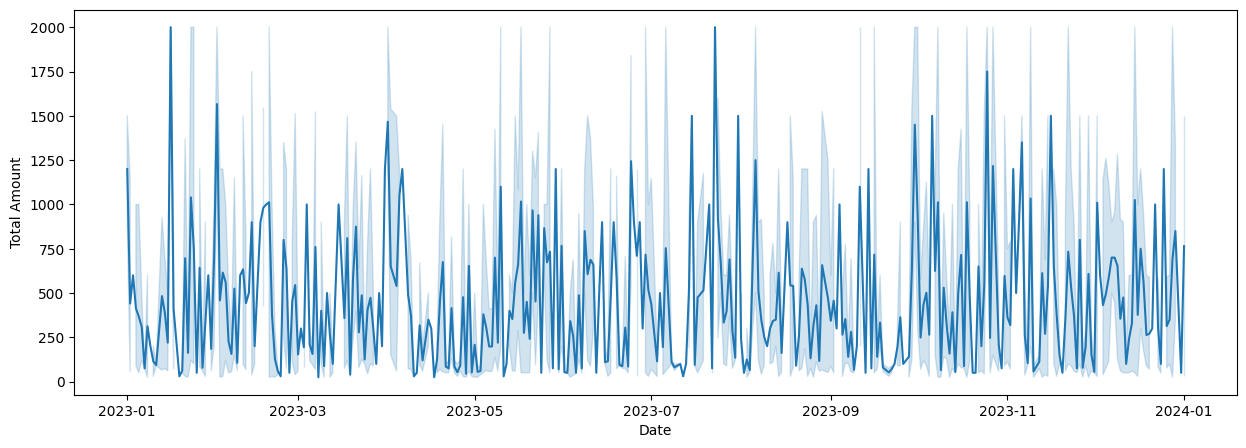

In [17]:
plot.figure(figsize = (15, 5))
sns.lineplot(x="Date", y="Total Amount", data=data)

##Time series analysis

In [21]:
#creating month and date columns
data["Month"]=data["Date"].dt.month


In [22]:
data["year"]=data["Date"].dt.year

In [24]:
#monthly sales
Monthly_sales = data.groupby(["year","Month"], as_index=False)["Total Amount"].sum()
data["Monthly_sales"]=Monthly_sales["Total Amount"]


<function matplotlib.pyplot.show(close=None, block=None)>

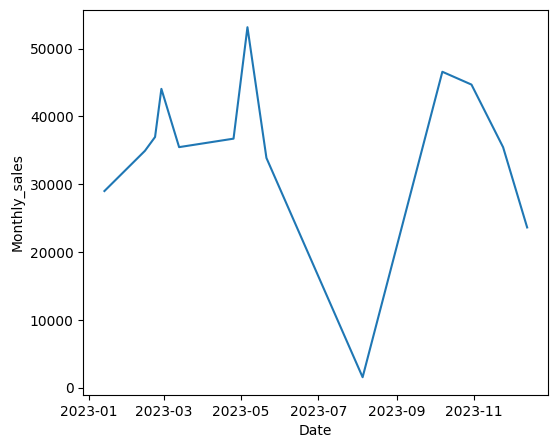

In [26]:
plot.figure(figsize=(6,5))
sns.lineplot(x="Date", y="Monthly_sales", data=data)
plot.show

In [27]:
data = data.drop(['Month', 'year', 'Monthly_sales'], axis=1)

In [28]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


In [42]:
#creating age brackets 
age_bins=[10,20,30,40,50,60]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50+']
data['Age group'] = pd.cut(data["Age"], bins=age_bins, labels=age_labels, right=True)

In [44]:
Total_amount_by_age= data.groupby('Age group', observed=True)['Total Amount'].sum()
print(Total_amount_by_age)

Age group
10-19     34730
20-29     98215
30-39     95950
40-49     93795
50+      100085
Name: Total Amount, dtype: int64


In [57]:
Grouped_data = data.groupby(['Age group', 'Product Category'],observed=True)['Total Amount'].sum().reset_index()
print(Grouped_data)


   Age group Product Category  Total Amount
0      10-19           Beauty         11850
1      10-19         Clothing          7255
2      10-19      Electronics         15625
3      20-29           Beauty         33860
4      20-29         Clothing         41415
5      20-29      Electronics         22940
6      30-39           Beauty         32825
7      30-39         Clothing         31250
8      30-39      Electronics         31875
9      40-49           Beauty         33095
10     40-49         Clothing         29540
11     40-49      Electronics         31160
12       50+           Beauty         26835
13       50+         Clothing         34990
14       50+      Electronics         38260


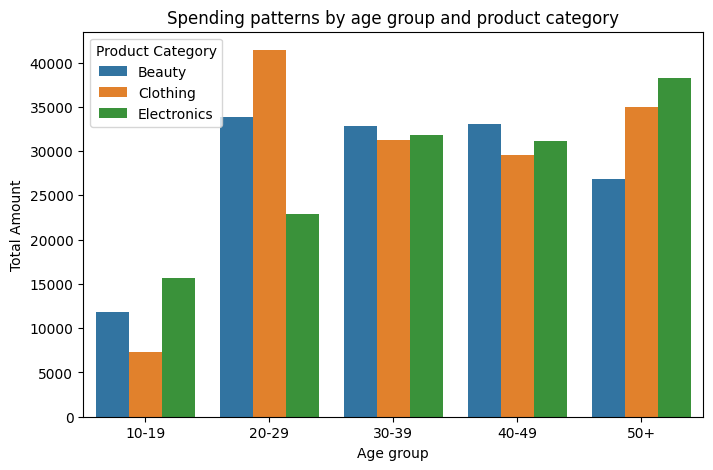

In [60]:
plot.figure(figsize=(8,5))
sns.barplot(x='Age group', y='Total Amount', hue='Product Category', data=Grouped_data)
plot.title('Spending patterns by age group and product category')
plot.xlabel('Age group')
plot.ylabel('Total Amount')
plot.show()

In [61]:
#total amount spent by the average male vs female
Avg_amount_by_gender= data.groupby('Gender')['Total Amount'].mean()
print(Avg_amount_by_gender)

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


#product performance analysis

In [67]:
Total_revenue = data.groupby('Product Category')['Total Amount'].sum().reset_index()
print(Total_revenue)

  Product Category  Total Amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


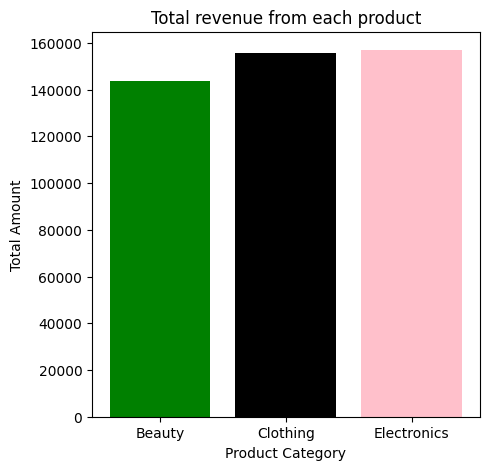

In [72]:
plot.figure(figsize=(5,5))
plot.bar(Total_revenue['Product Category'], Total_revenue['Total Amount'], color=['green', 'black', 'pink'])
plot.title('Total revenue from each product')
plot.xlabel('Product Category')
plot.ylabel('Total Amount') 
plot.show()                                                                                